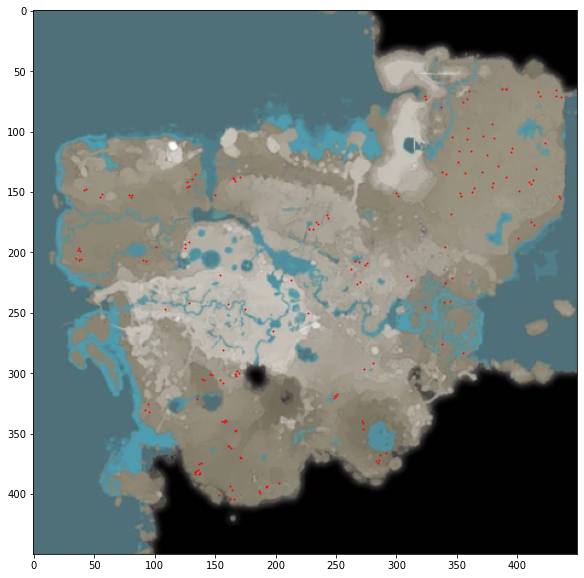

In [1]:
from satisfactory_planner import ResourceData
res_data = ResourceData()
nodes_df = res_data.get_raw(force_update=True)
res_data.show_on_map(nodes_df[nodes_df['name'].isin(['coal', 'iron-ore'])])


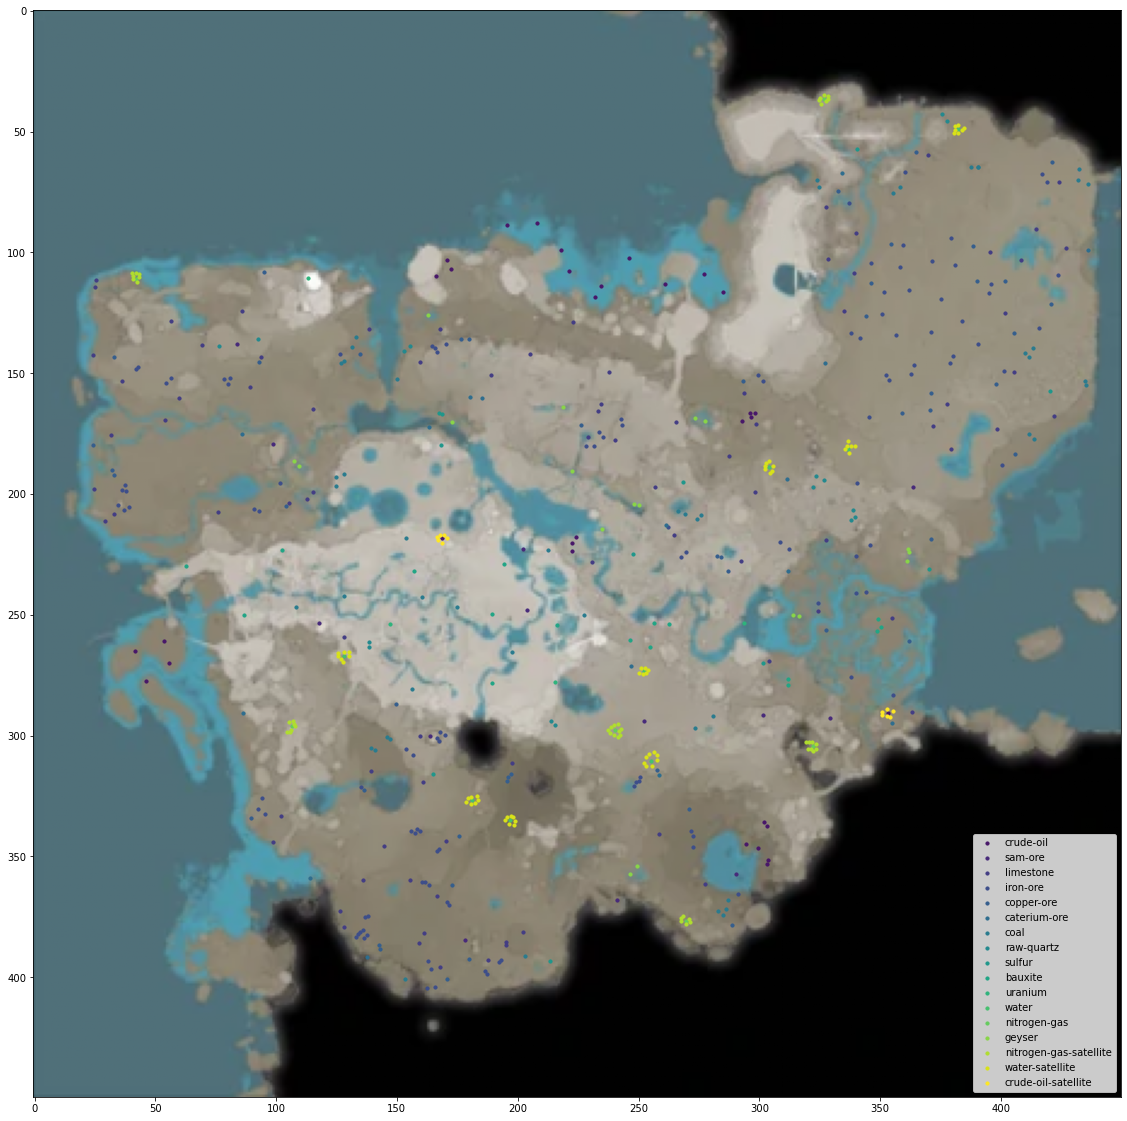

In [2]:
# Example 2
res_data.show_on_map(nodes_df, segment_key='name', figsize = [20, 20], s=10)

## Extraction and storage of materials

Our focus is on complete utilization of resources.
Every resource produced in the most efficient way possible.

We find the locations using the **quality** of the node as a heuristic.

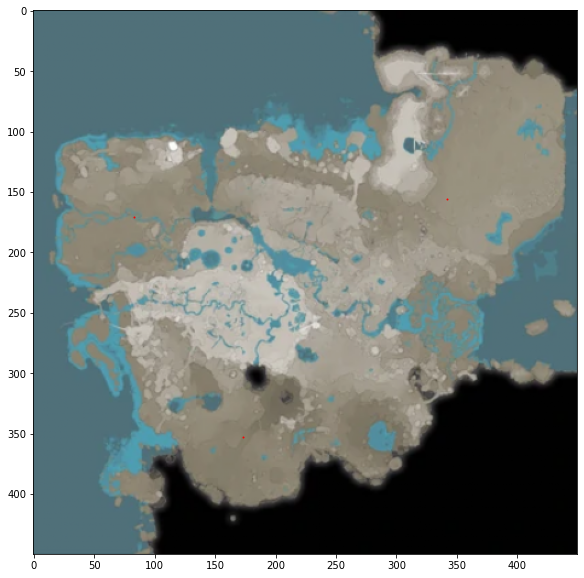

In [3]:
# Example
res_data.show_on_map(res_data.get_cluster_points(['iron-ore'], label = 'iron-clusters'))

In [4]:
# example 2
clusters = None
for resource in ['Iron Ore', 'Coal', 'Bauxite', 'Copper Ore', 'Crude Oil', 'Limestone', 'Uranium', 'Caterium Ore', 'Sulfur', 'Raw Quartz']:
    df = res_data.get_cluster_points([resource.lower().replace(' ','-')], label=resource.lower().replace(' ', '-') + '-cluster', max_count = 8)
    print(resource, len(df))
    if clusters is None:
        clusters = df
    else:
        clusters = clusters.append(df, ignore_index=True)
del df

Iron Ore 3
Coal 2
Bauxite 5
Copper Ore 3
Crude Oil 8
Limestone 3
Uranium 2
Caterium Ore 4
Sulfur 4
Raw Quartz 6


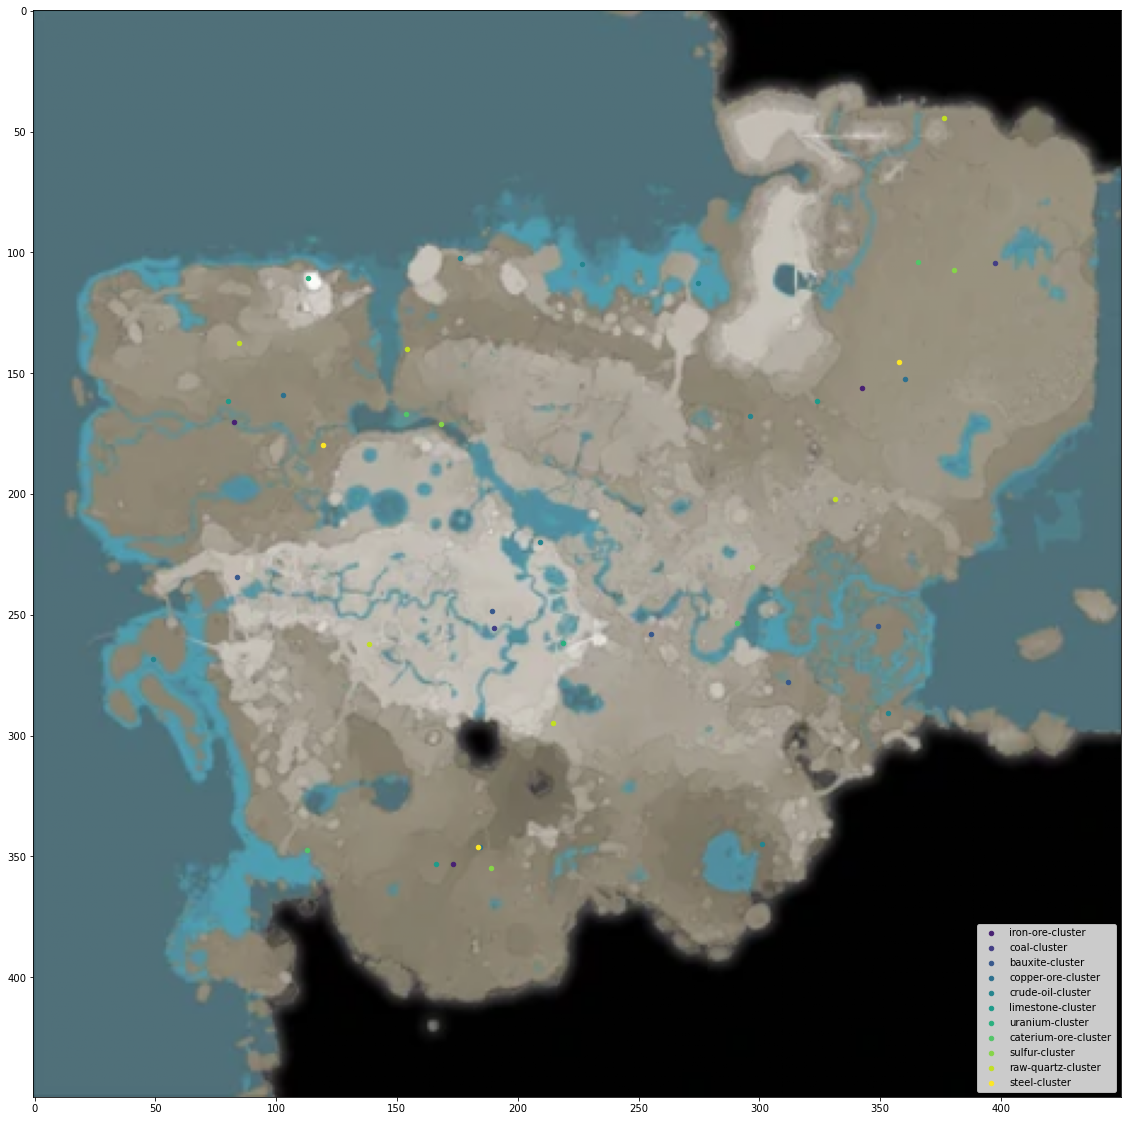

In [5]:
# Composites

# Steel
df = res_data.get_cluster_points(['coal', 'iron-ore'], label = 'steel-cluster', max_count = 8)
clusters = clusters.append(df, ignore_index=True)
res_data.show_on_map(clusters, s=20, figsize=[20, 20], segment_key='label')

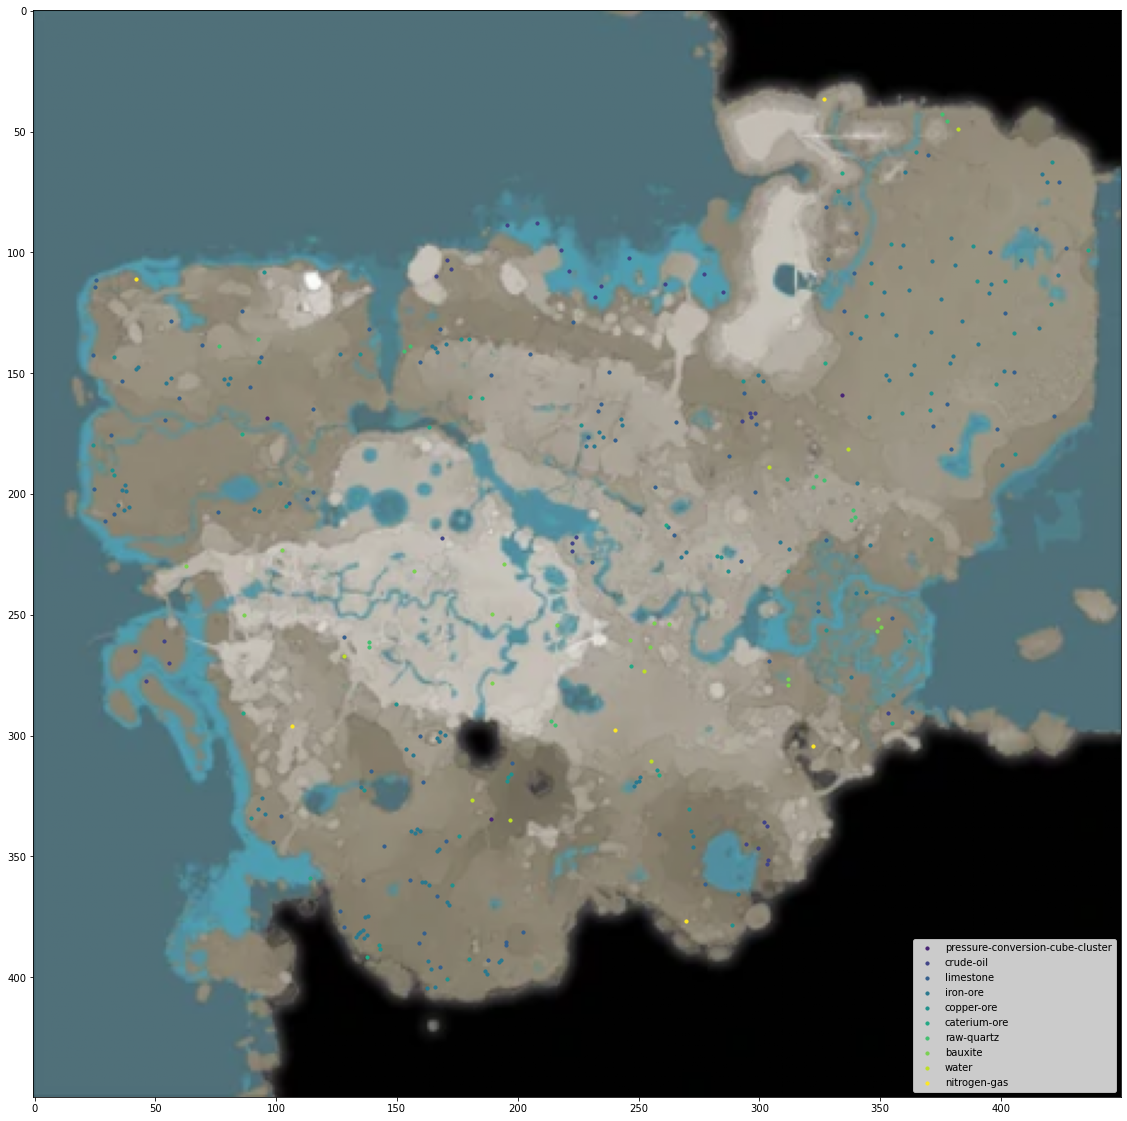

In [6]:
materials = ['bauxite', 'caterium-ore', 'copper-ore', 'iron-ore', 'limestone', 'raw-quartz', 'crude-oil', 'nitrogen-gas', 'water']
res_df = res_data.get_cluster_points(materials, label='pressure-conversion-cube-cluster', max_count= 8)
matter_nodes = nodes_df[nodes_df['name'].isin(materials)]
matter_nodes = matter_nodes.rename(columns={'name':'label'})
res_df = res_df.append(matter_nodes)
res_data.show_on_map(res_df, segment_key='label', figsize = [20, 20], s=10)
# nodes_df[nodes_df['name'].isin(materials)]
# res_df

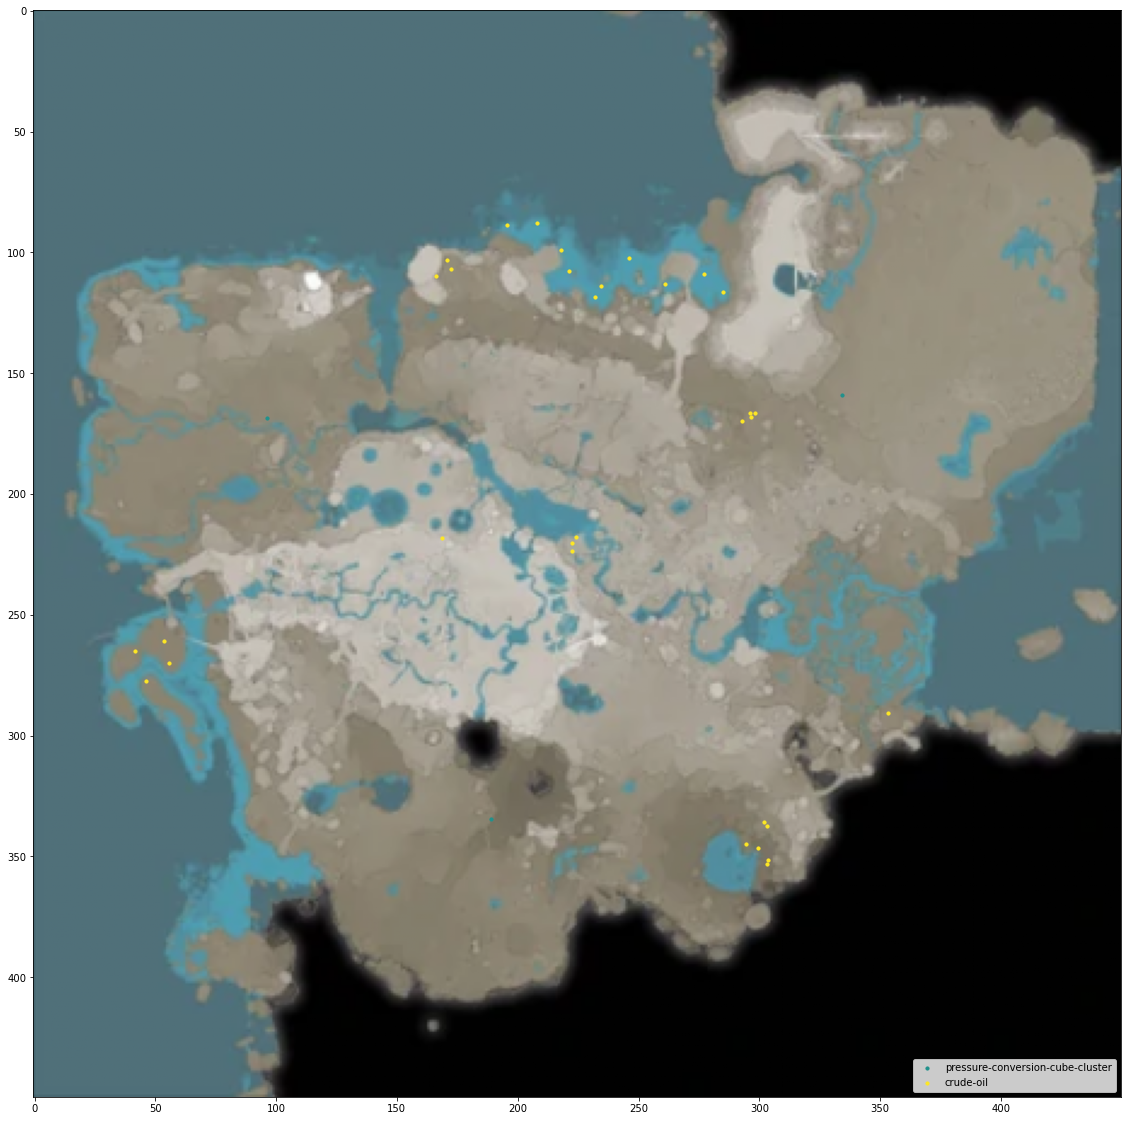

In [7]:
res_data.show_on_map(res_df[res_df['label'].isin(['crude-oil', 'pressure-conversion-cube-cluster'])], segment_key='label', figsize = [20, 20], s=10)